# Unsupervised Learning

## *Bogdan Bošković*


Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

# Learning objectives
Through completing this assignment you will be able to...
1. Apply the full supervised machine learning pipeline of preprocessing, model selection, model performance evaluation and comparison, and model application to a real-world scale dataset
2. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters
3. Apply PCA and t-SNE for performing dimensionality reduction and data visualization

**ANSWER**

# 2

## [25 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience applying clustering algorithms and comparing these techniques on various datasets to experience the pros and cons of these approaches when the structure of the data being clustered varies. For this exercise, we'll explore clustering in two dimensions to make the results more tangible, but in practice these approaches can be applied to any number of dimensions.

*Note: For each set of plots across the five datasets, please create subplots within a single figure (for example, when applying DBSCAN - please show the clusters resulting from DBSCAN as a single figure with one subplot for each dataset). This will make comparison easier.*

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below.

- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When it's not clear, you will have to use your judgment in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing the quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 

- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

*Note: For these clustering plots in this question, do NOT include legends indicating cluster assignment; instead, just make sure the cluster assignments are clear from the plot (e.g. different colors for each cluster)*



Code is provided below for loading the datasets and for making plots with the clusters as distinct colors

In [1]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5],\
   random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [2]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2] 
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, 
            # color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],\
            s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_title(f'Clusters = {n_clusters}')
        ax.axis('off')

**a. Scatterplotting:**

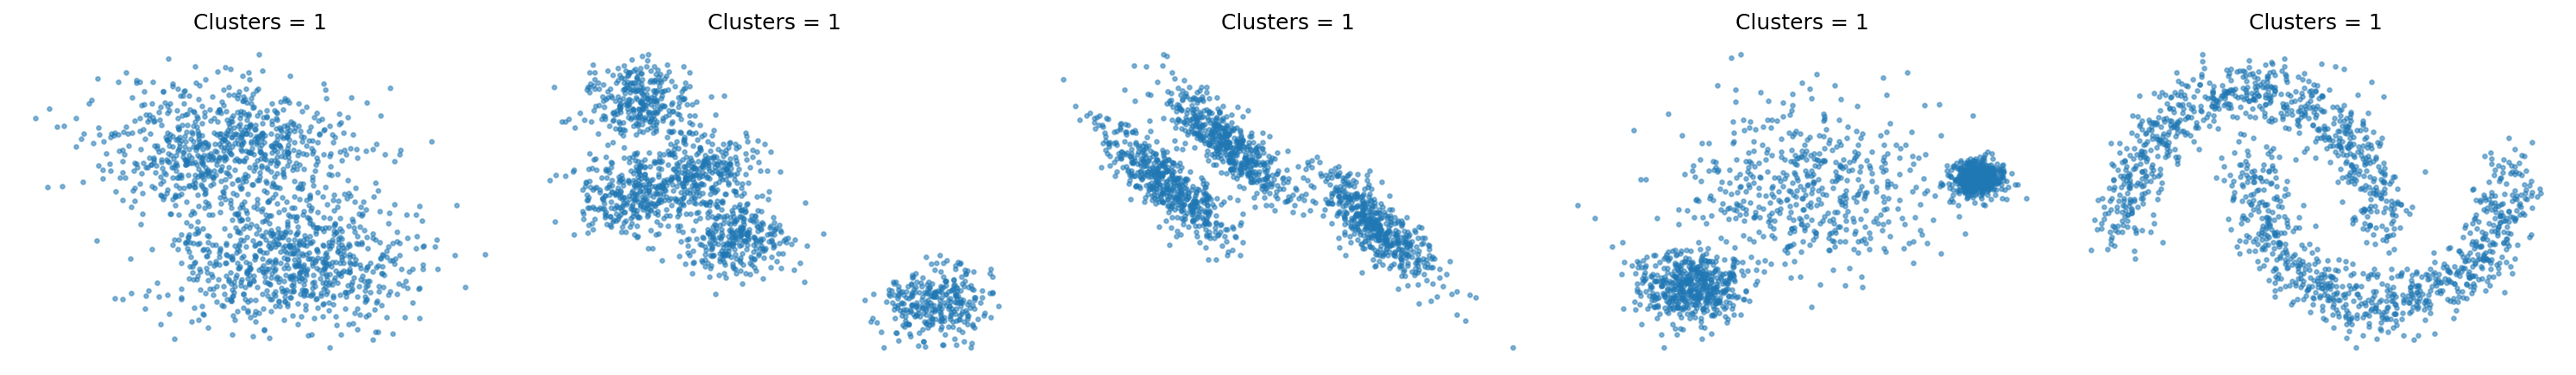

In [3]:
# plot all the data on the same figure
fig, axes = plt.subplots(1, len(X), figsize=(20, 3), dpi=150)
for i, ax in enumerate(axes):
    plot_cluster(ax, X[i], np.zeros(len(X[i])))
plt.tight_layout()
plt.show()

**Runnning K-means:**

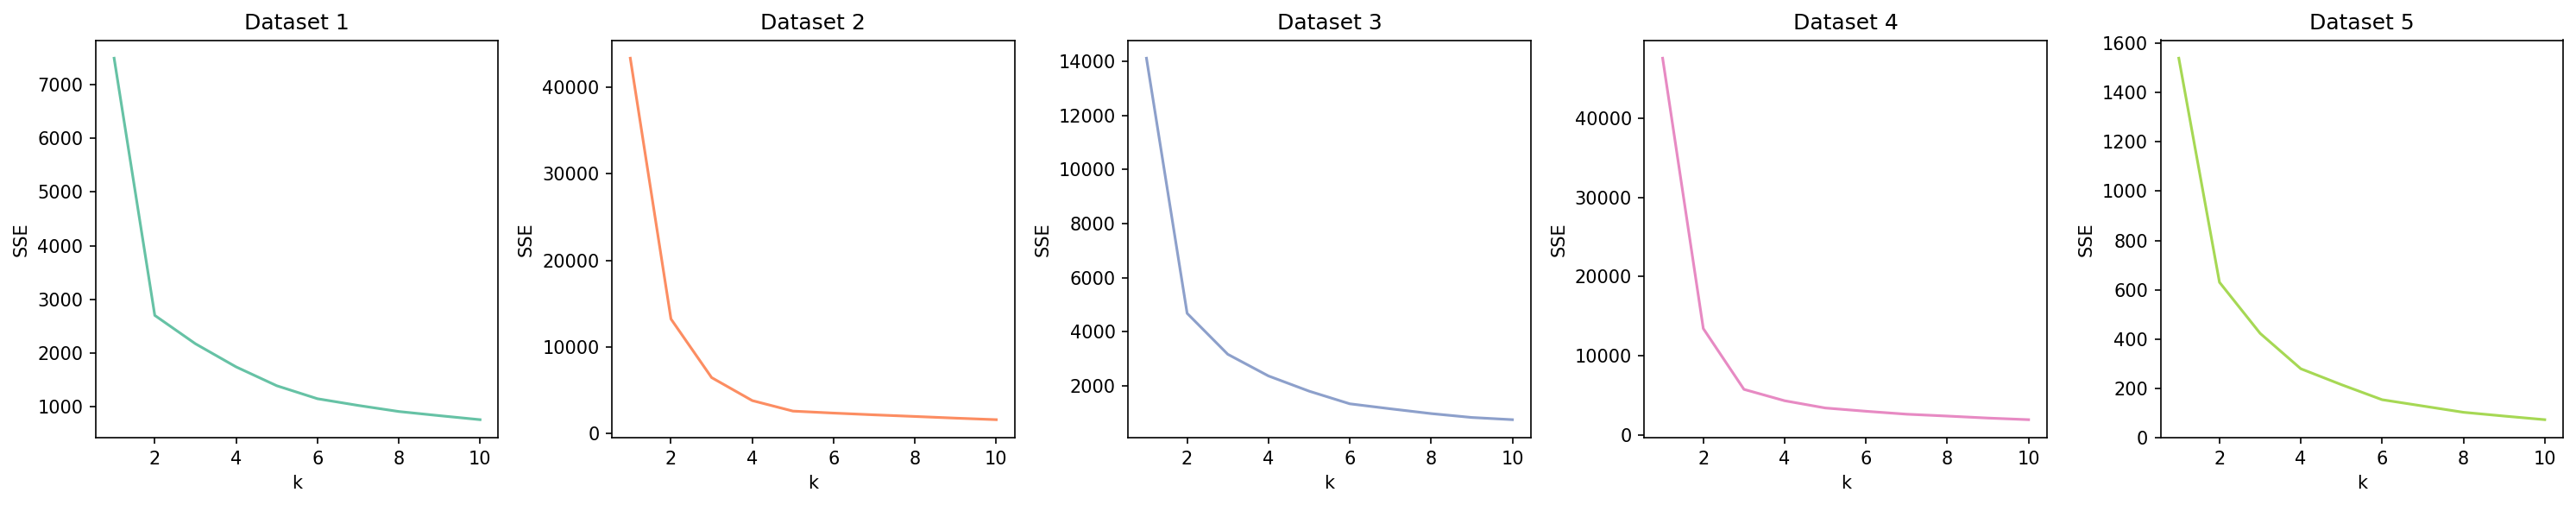

In [4]:
from sklearn.cluster import KMeans, DBSCAN, spectral_clustering
# suppress warnings
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

# run k-means for each dataset, for each value of k, and plot elbow curve
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axes = plt.subplots(1, len(X), figsize=(20, 4), dpi=150)
for i, ax in enumerate(axes):
    sse = []
    for j in k:
        kmeans = KMeans(n_clusters=j, random_state=0).fit(X[i])
        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_)
    ax.plot(k, sse, color=plt.cm.Set2(int(k[i])/10.))
    ax.set_title(f'Dataset {i+1}')
    ax.set_xlabel('k')
    ax.set_ylabel('SSE')
plt.tight_layout()
plt.show()

**Analyzing the elbow curves:**

Sets 1, 3, and 5 have a fairly clear elbow at $k=2$, and while the same could be said for sets 2 and 4, a $k=3$ value would be equally appropriate-- just by analyzing the elbow curves. 

The elbow curves plot the within-cluster sum-of-squares, which is a measure of how close the data points are to the centroid of the cluster. For dataset 3, the two clusters to the top right have centroids that are very close to each other, which might be why the elbow appears to be at $k=2$. 

Looking at the scatterplots, I have to stray from blindly looking at elbows and set the $k$-value to 4 for dataset two, and 3 for dataset three.

I will be moving forward with a the following values, based on the elbow curves and my own judgement of the scatterplots:

|   	| Set 1 	| Set 2 	| Set 3 	| Set 4 	| Set 5 	|
|---	|-------	|-------	|-------	|-------	|-------	|
| k 	| 2     	| 4     	| 3     	| 3     	| 2     	|


**Plotting the clustered data:**

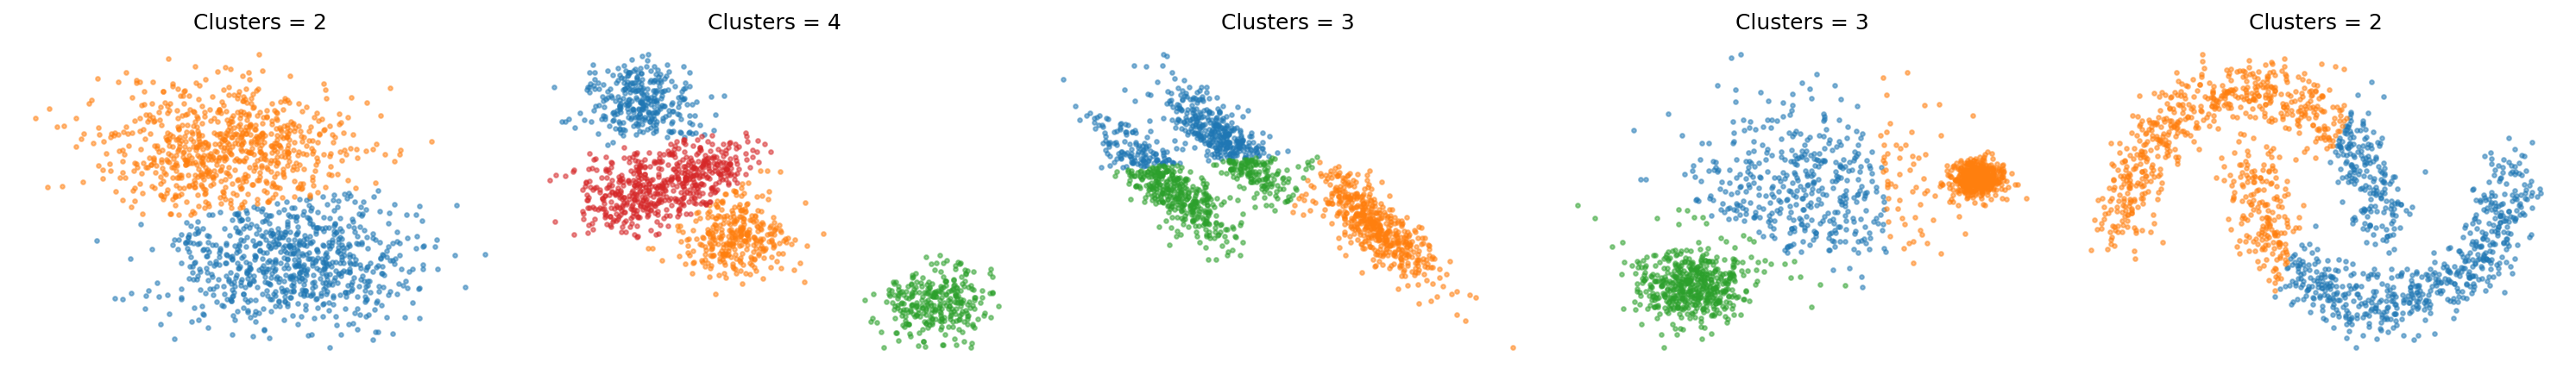

In [5]:
k = [2, 4, 3, 3, 2]
fig, axes = plt.subplots(1, len(X), figsize=(20, 3), dpi=150)
for i, ax in enumerate(axes):
    kmeans = KMeans(n_clusters=k[i], random_state=0).fit(X[i])
    plot_cluster(ax, X[i], kmeans.labels_)
plt.tight_layout()
plt.show()

K-means does a pretty great job on datasets 1, 2, and, to an extent, 4 (with noisy overlap). Dataset 3 was surprising because the upper left clusters are clearly linearly separable, and yet it failed. Dataset 5 was an expected failure.

**b. DBSCAN:**

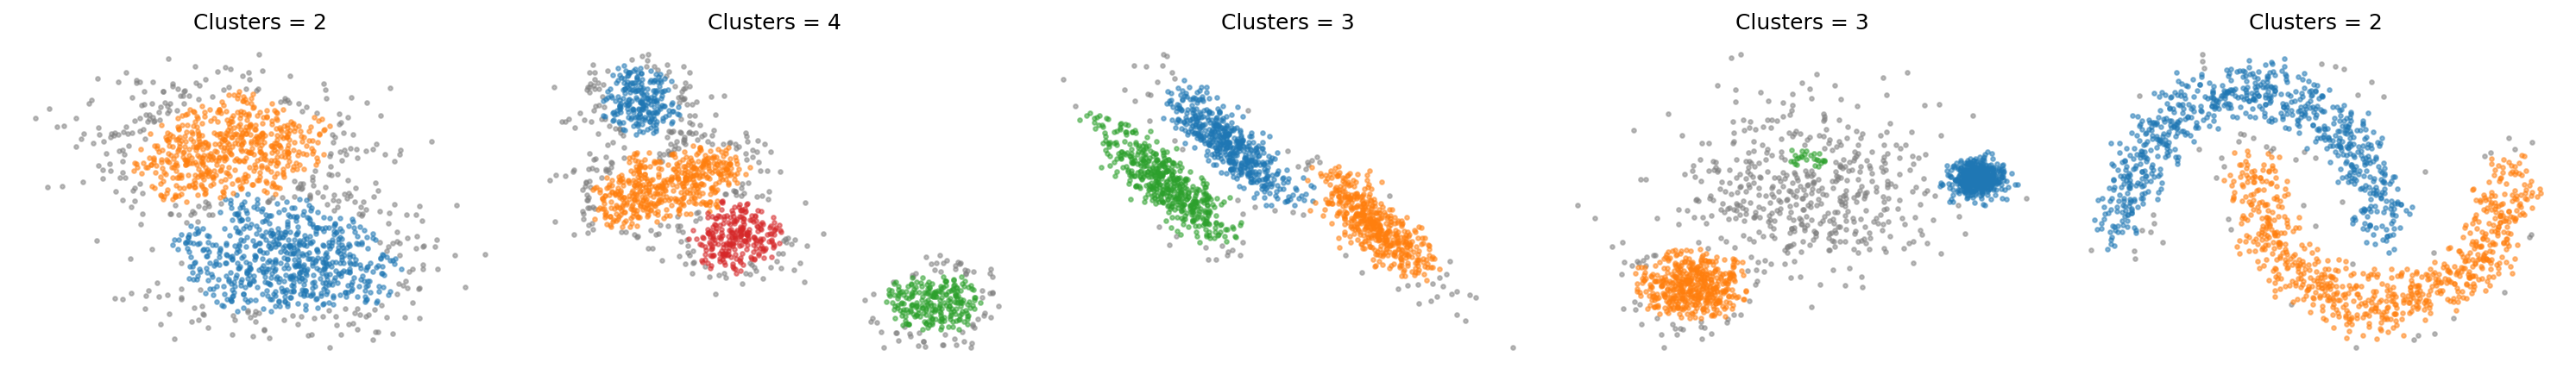

In [6]:
eps = [0.32, 0.5, 0.4, 0.5, 0.1]
min_samples = [18, 20, 10, 15, 10]
fig, axes = plt.subplots(1, len(X), figsize=(20, 3), dpi=150)
for i, ax in enumerate(axes):
    db = DBSCAN(eps=eps[i], min_samples=min_samples[i]).fit(X[i])
    plot_cluster(ax, X[i], db.labels_)
plt.tight_layout()
plt.show()

Datasets 1 and 4 proved to be most challenging when recreating my chosen numbers of clusters. 

Dataset 4 in particular has two highly-dense clusters, with a third low density cluster lying in between them. Varying the eps or min_samples parameters invariably resulted in splitting the low-density cluster into multiple non-sensical clusters.

**c. Spectral Clustering:**

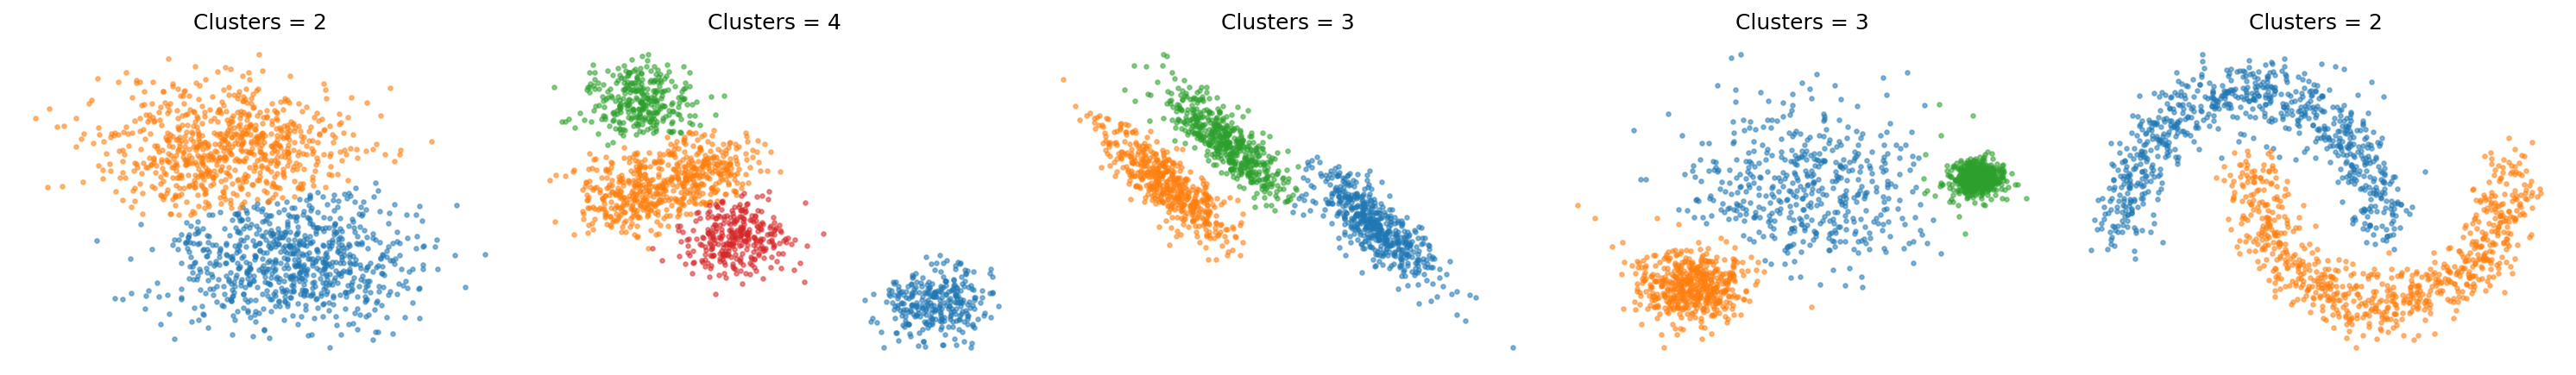

In [41]:
from sklearn.cluster import SpectralClustering
n_clusters = [2, 4, 3, 3, 2]
n_components = [3, 3, 6, 3, 4]
fig, axes = plt.subplots(1, len(X), figsize=(20, 3), dpi=150)
for i, ax in enumerate(axes):
    sc = SpectralClustering(n_clusters=n_clusters[i], affinity='nearest_neighbors',\
         n_neighbors=40, n_components=n_components[i])
    sc.fit(X[i])
    plot_cluster(ax, X[i], sc.labels_)
plt.tight_layout()
plt.show()

**d. Commenting on the strengths and weaknesses of each approach:**

I have a soft spot for K-means due to its computational efficiency and decent results. DBSCAN, while a useful tool in the arsenal for specific cases, is very fanciful when it comes to clusters of non-uniform densities. DBSCAN required surgical tweaking of parameters to yield subpar results on clusters which K-means handled out of the box.

Spectral clustering is the clear winner here, however. While it did require some tweaking of parameters, it yielded near-perfect results.



---

# 3

## [25 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that while t-SNE has a `fit` method and a `fit_transform` method, these methods are actually identical, and there is no `transform` method. Why is this? What implications does this imply for using this method?

*Note: Remember that you typically will not have labels available in most problems.*

Code is provided for loading the data below.

In [42]:
################################
# Load the data
################################
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

**ANSWER**

**a. Reducing dimensionality with PCA:**

In [47]:
# reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_digits)

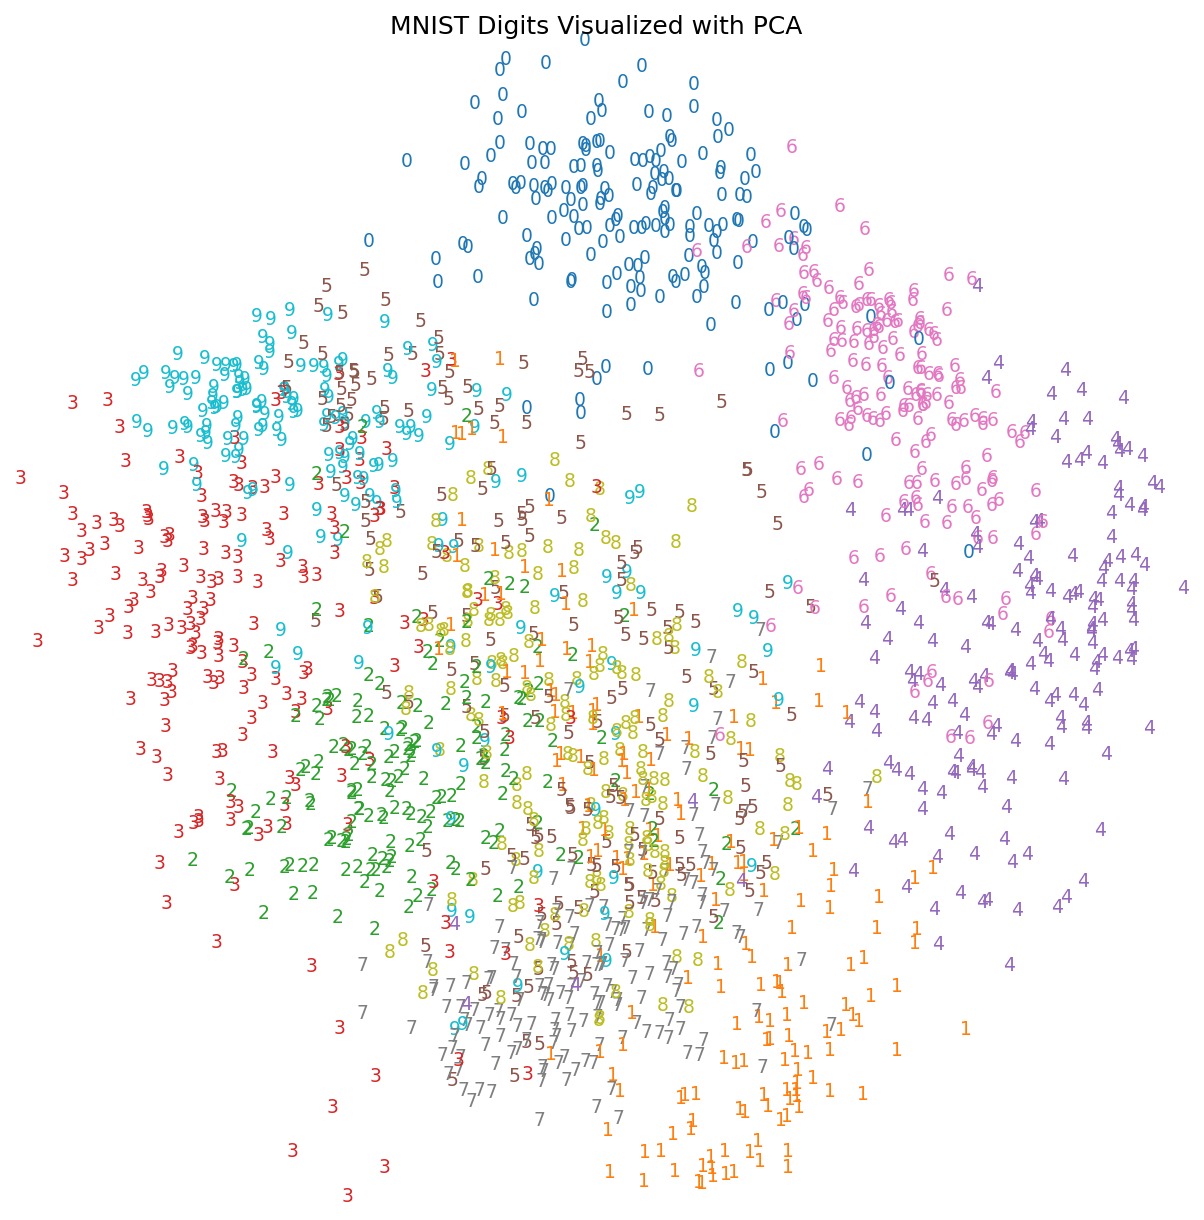

In [48]:
# Plot with the actual digits
fig, ax = plt.subplots(figsize=(10, 10), dpi=150)
for i in range(len(X_pca)):  # Ensure loop runs only till the length of X_tsne
  plt.text(X_pca[i, 0], X_pca[i, 1], str(y_digits[i]),
       color=plt.cm.tab10(int(y_digits[i])/10.),
       fontdict={'size': 9})

plt.xlim(min(X_pca[:, 0]), max(X_pca[:, 0]))
plt.ylim(min(X_pca[:, 1]), max(X_pca[:, 1]))
plt.title('MNIST Digits Visualized with PCA')
plt.axis('off')
plt.show()

**b. Plotting the cumulative fraction of variance (explained):**

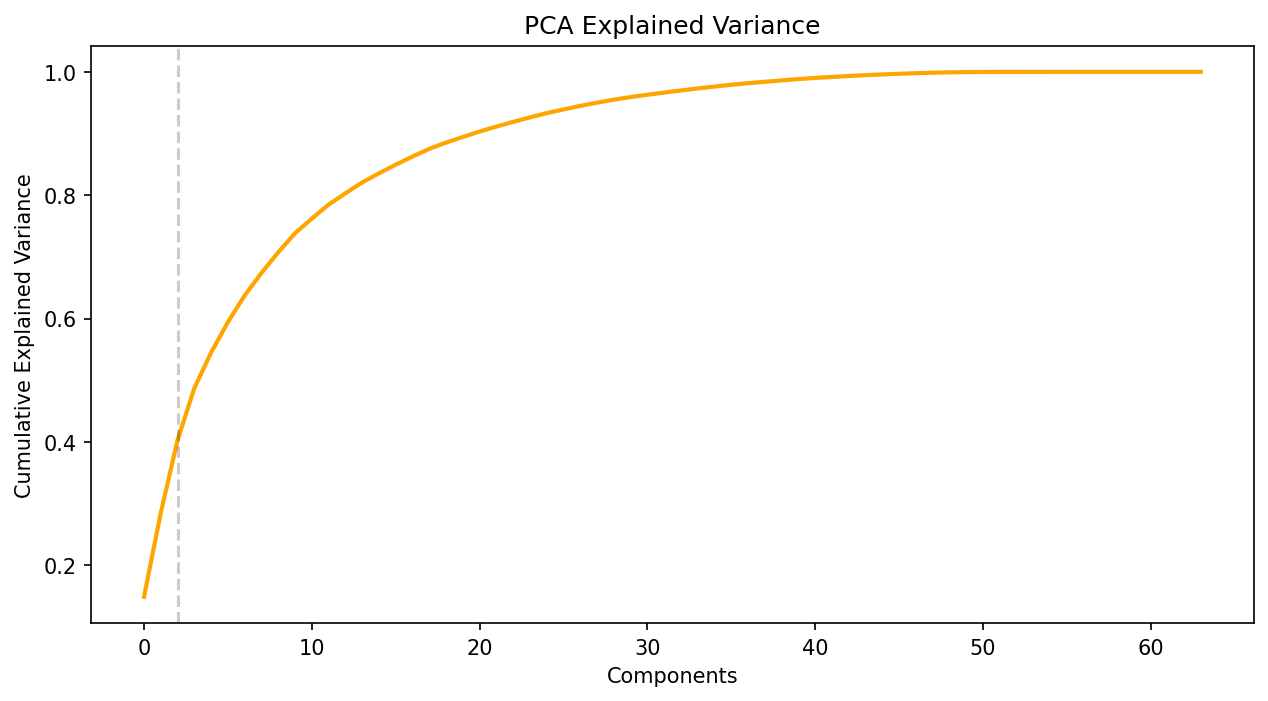

In [60]:
pca = PCA().fit(X_digits)
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='orange', lw=2)
# set tick mark at 2 components
plt.axvline(2, c='k', ls='--', alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

Having set a vertical line at Components=2, it is clear from this plot that 60% of the variance in the data is *unexplained* by the first two principal components.

Reducing such a high-dimensional dataset to two dimensions is bound to lose a lot of information. This is probably why the data is so poorly clustered in the PCA plot.

**c. Reducing dimensionality with t-SNE:**

In [61]:
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=50, n_iter=5000)
X_tsne = tsne.fit_transform(X_digits)

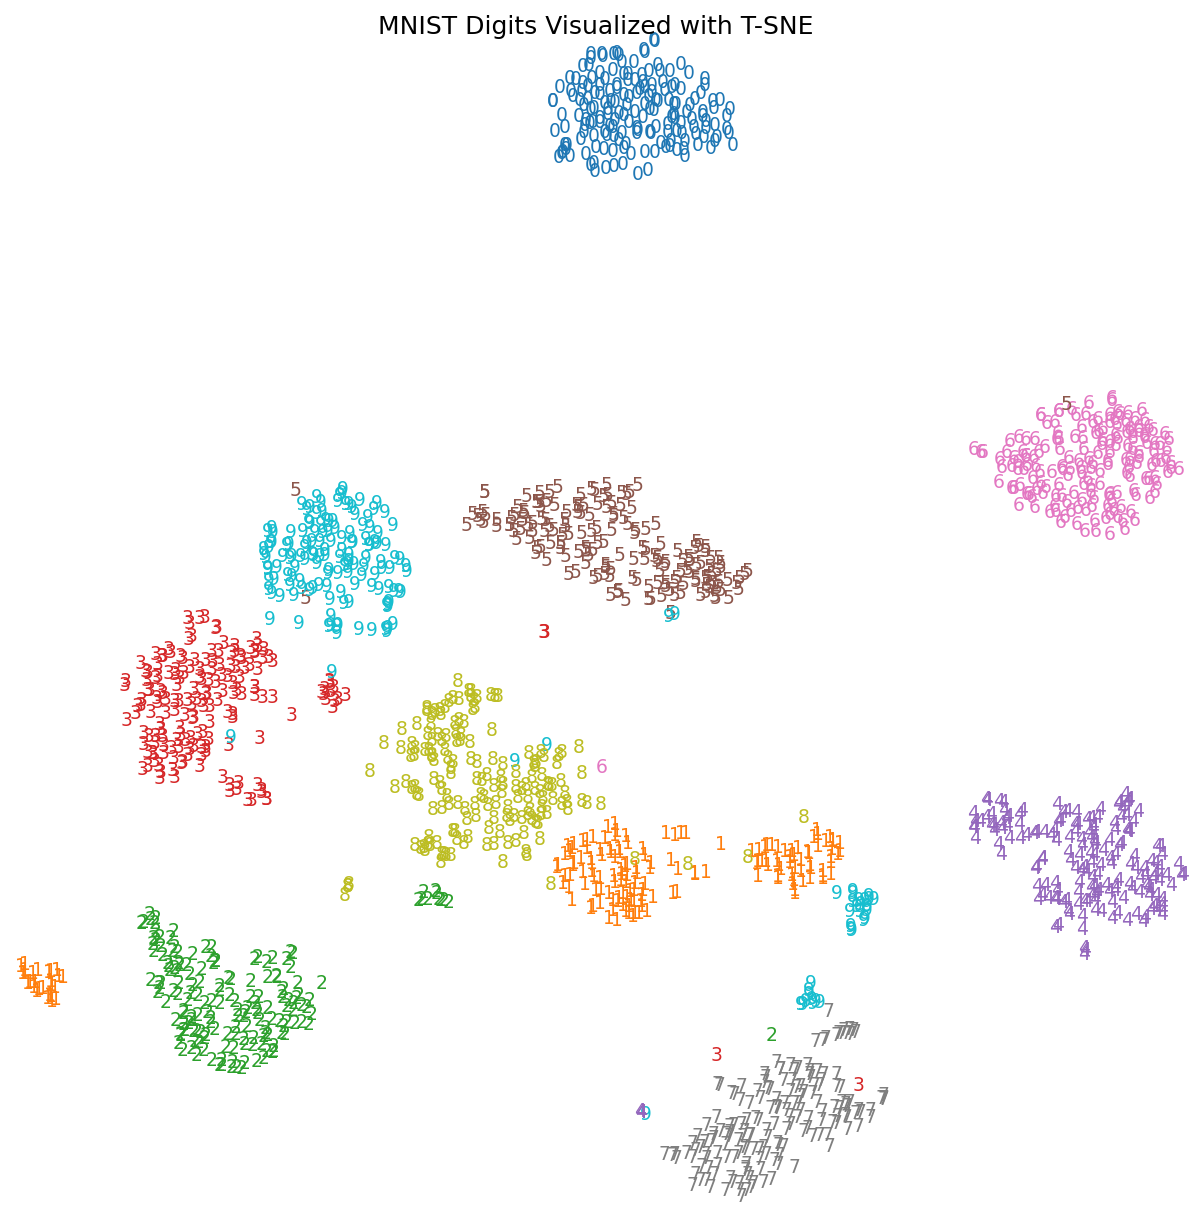

In [62]:
# Plot with the actual digits
fig, ax = plt.subplots(figsize=(10, 10), dpi=150)
for i in range(len(X_tsne)):  # Ensure loop runs only till the length of X_tsne
  plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y_digits[i]),
       color=plt.cm.tab10(int(y_digits[i])/10.),
       fontdict={'size': 9})

plt.xlim(min(X_tsne[:, 0]), max(X_tsne[:, 0]))
plt.ylim(min(X_tsne[:, 1]), max(X_tsne[:, 1]))
plt.title('MNIST Digits Visualized with T-SNE')
plt.axis('off')
plt.show()

**d. Comparing/contrasting the performance of PCA and t-SNE:**

t-SNE was almost incomparably more accurate in separating the poorly-written mNIST digits. There is some overlap, but I believe that the neural network in my skull would cluster those edge-case digits in the same fashion (having plotted some of the digits in 2D-- they are worse than captchas). 

t-SNE is a non-linear dimensionality reduction technique. PCA is a linear technique, and is therefore limited in its ability to separate non-linearly separable data. t-SNE does not learn a mapping function but rather learns a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked, whilst dissimilar points have an extremely small probability of being picked. This is why it does not have a transform method.

This implies that t-SNE is a bad choice for supervised learning, but a great choice for unsupervised learning.

---